In [36]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter

In [8]:
# importing the cleaned dataset
exploded_df = pd.read_csv('../data/processed/cleaned_data_exploded.csv')
imploded_df = pd.read_csv('../data/processed/cleaned_data_imploded.csv')

# Exploring Continuous Attributes

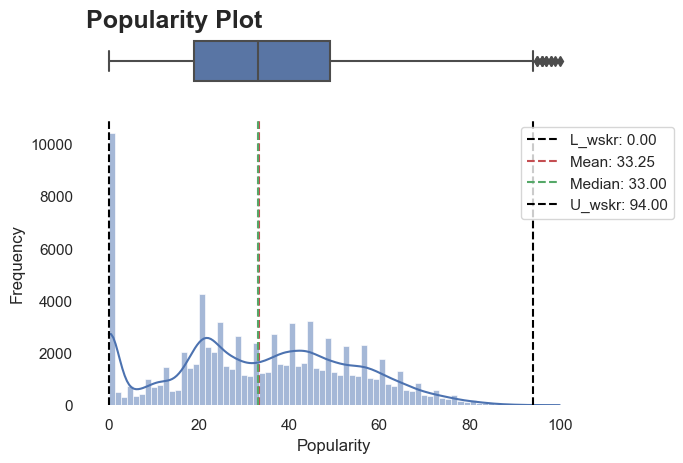

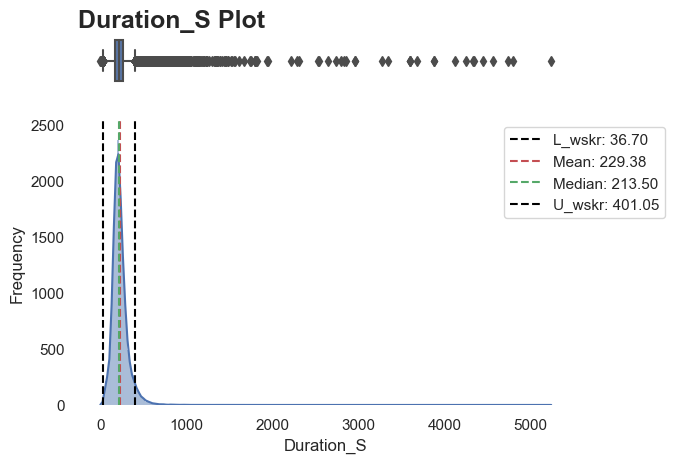

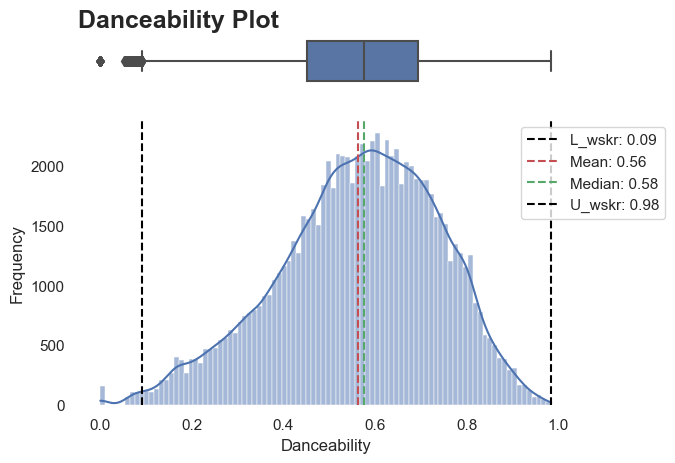

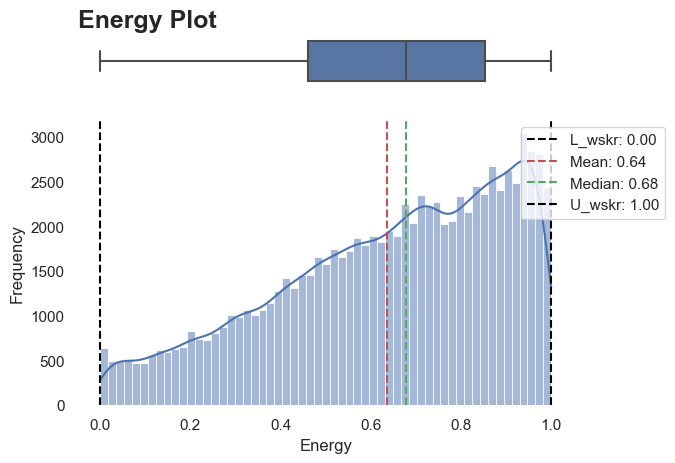

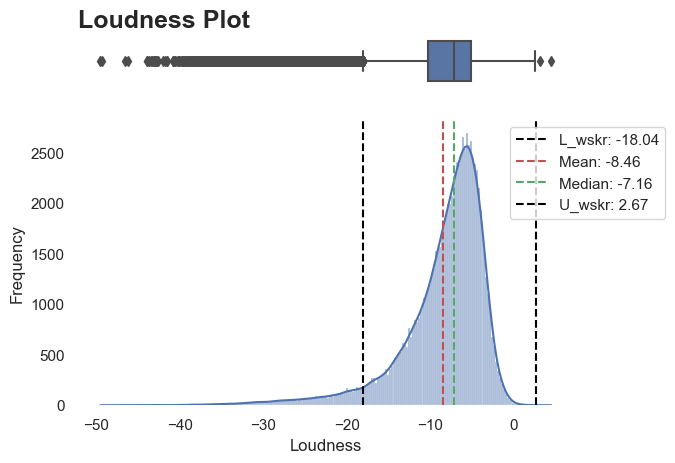

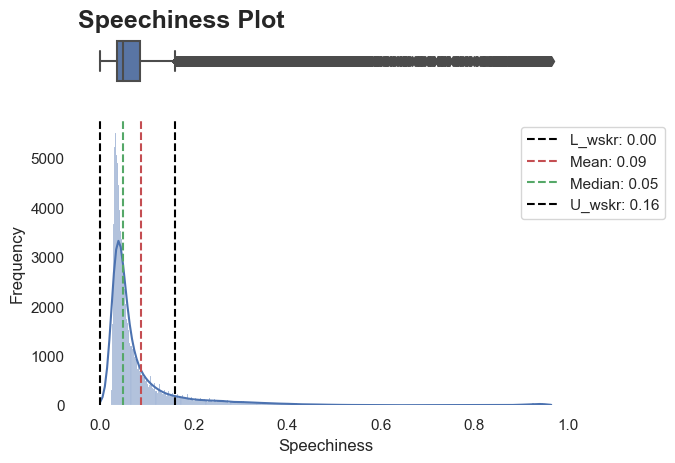

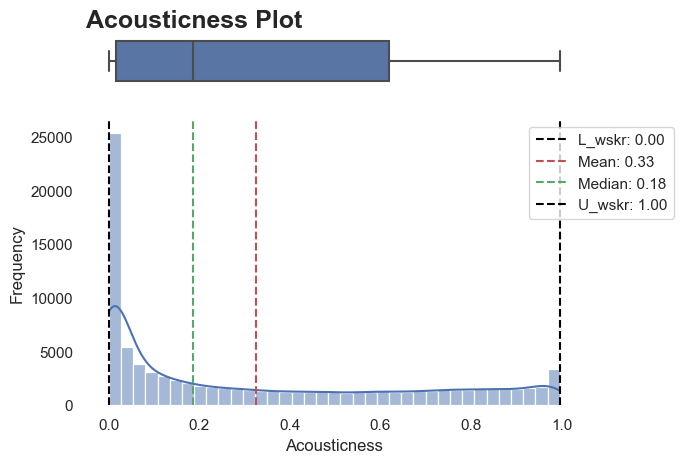

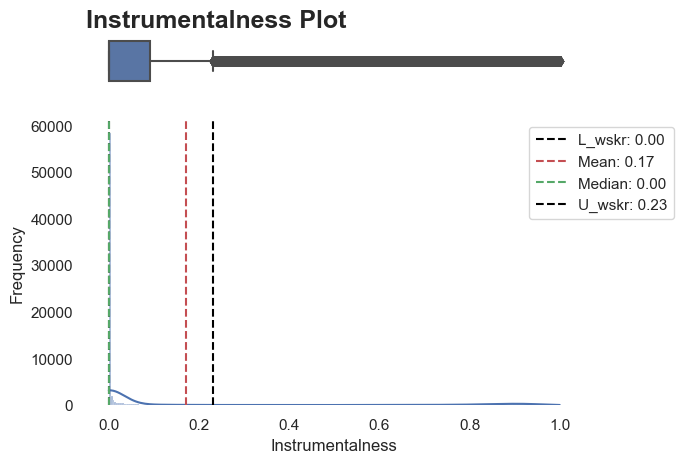

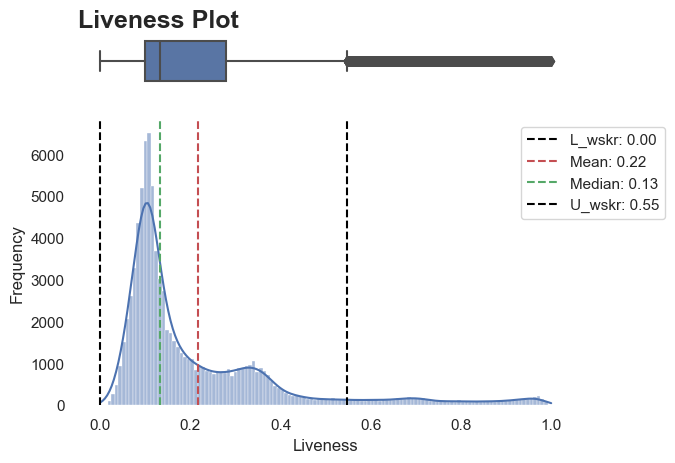

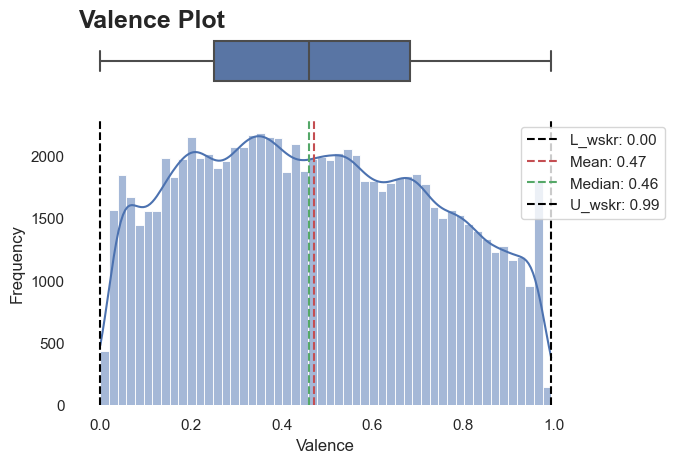

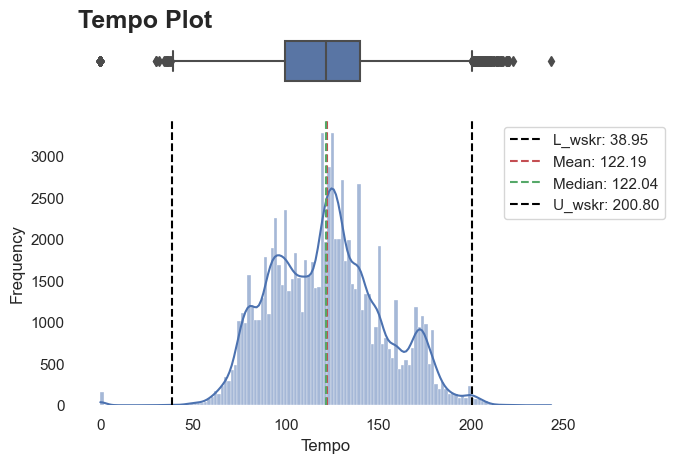

In [220]:
columns_to_plot = ['popularity', 'duration_s', 'danceability', 'energy',
                    'loudness', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo']

# Histogram and Boxplot of continuous audio features
for col in columns_to_plot:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(x=imploded_df[col], ax=ax_box, orient='h')
    sns.histplot(imploded_df[col], ax=ax_hist, kde=True)
    
    ax_box.set_xlabel('')
    ax_hist.set_xlabel(col.title())
    
    mean_val = imploded_df[col].mean()
    median_val = imploded_df[col].median()
    q25 = imploded_df[col].quantile(0.25)
    q75 = imploded_df[col].quantile(0.75)
    iqr = q75 - q25
    lower_limit = max(imploded_df[col].min(), q25 - 1.5 * iqr)
    upper_limit = min(imploded_df[col].max(), q75 + 1.5 * iqr)
    
    ax_hist.axvline(lower_limit, color='black', linestyle='--', label=f'L_wskr: {lower_limit:.2f}')
    ax_hist.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    ax_hist.axvline(upper_limit, color='black', linestyle='--', label=f'U_wskr: {upper_limit:.2f}')
    ax_hist.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    ax_box.set_title(f'{col.title()} Plot', loc='left', fontsize=18, fontweight='bold')
    ax_hist.set_ylabel('Frequency')

    ax_box.spines['top'].set_visible(False)
    ax_box.spines['right'].set_visible(False)
    ax_box.spines['bottom'].set_visible(False)
    ax_box.spines['left'].set_visible(False)
    ax_box.grid(False)

    ax_hist.spines['top'].set_visible(False)
    ax_hist.spines['right'].set_visible(False)
    ax_hist.spines['bottom'].set_visible(False)
    ax_hist.spines['left'].set_visible(False)
    ax_hist.grid(False)
    
    plt.show()


### Observations:
- Popularity
    1. Approximately 9.3k tracks with a popularity score of 0 haven't been played anytime remotely recently. Among these, the top genres are jazz (7%), Iranian (6%), soul (6%), and country (6%). This indicates that these genres have faded in popularity over time, with listeners favoring other genres.
    2. There are 15 tracks with a popularity score exceeding 90. Four of these are standalone pop songs currently dominating the popular charts, and two are reggae tracks.
    3. The mean and median popularity scores are both around 33, suggesting that roughly 50k tracks belong to the lower third of popularity. The dataset is not significantly affected by outlier tracks with popularity scores above 94.
    4. The proportion of tracks gradually decreases as popularity exceeds ~55. Fewer songs have higher popularity scores, suggesting a cyclical pattern where popular songs tend to stay in the limelight, leaving only a few tracks with scores above 45, while most tracks lag behind in terms of popularity.
- Duration_s
    There are around 4k outliers in the duration_s (duration in seconds) category, although their influence on the mean is not substantial, as it remains relatively close to the median. The curve is characterized by high leptokurtosis and removing these outliers would result in a more normally distributed plot.
    2. techno and chicago-house songs tend to have longer durations and are considered outliers. Additionally, there are a few breakbeat tracks with durations exceeding 2000 seconds, making them prominent among the extreme outliers.
    3. The mean duration of a song is approximately 40 minutes.
- Danceability
    1. The distribution of this variable follows a normal pattern, with a majority of songs having moderate danceability values. High and low danceability values are less common, with outliers predominantly leaning towards the lower end of the scale.
    2. Interestingly, 50% of these outliers belong to the 'sleep' genre, reflecting the idea that some listeners prefer soothing music for relaxation and sleep.
- Energy (Energetic tracks are typically characterized by their speed, loudness, and intensity)
    1. The median energy score is 0.68, indicating that 50% of the songs have higher levels of energy compared to the bottom two-thirds of the dataset.
    2. In the top third of songs, genres like hardstyle, death-metal, and metalcore dominate, while the bottom third is marked by genres such as new age, classical, ambient, and piano.
- Speechiness
    1. The presence of outliers in speechiness is primarily attributed to 'comedy' tracks, which exhibit unusually high speechiness values. Initially, it seemed that this genre might not contribute to danceability. However, upon closer examination by creating a subset of the dataframe for the comedy genre, it was discovered that these tracks have a mean danceability of 0.57 and a mean energy of 0.7. This suggests that comedy tracks may indeed have an impact on danceability, despite their distinctive speech-focused nature.
- Instrumentalness
    1. Genres like study, techno, and sleep have a notable presence among the outliers with high instrumentalness values. Combining this observation with our earlier finding that techno songs tend to have longer durations, it becomes apparent that techno tracks are less likely to inspire lively and energetic dancing.
- Valence
    1. There are no outliers in valence. The mean and median values are in close proximity, and the data appears to exhibit a roughly symmetrical distribution with minimal skew. The curve displays characteristics of a normal distribution and is notably platykurtic.
- Tempo
    1. Tempo displays an almost normal distribution, with a prominent peak occurring at approximately 125 beats per minute. There are a few outliers, accounting for roughly 1% of the data, distributed on both sides of the graph.
    

In [ ]:
exploded_df[exploded_df['tempo'] >200].shape

(575, 16)

In [ ]:
exploded_df[exploded_df['tempo'] >200]['track_genre'].value_counts()

track_genre
piano         29
rock          28
rockabilly    22
children      17
songwriter    16
              ..
folk           1
comedy         1
study          1
hardstyle      1
electronic     1
Name: count, Length: 109, dtype: int64

In [ ]:
imploded_df[imploded_df['track_genre']=='comedy'].describe()

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,24.708467,229.675075,0.658092,0.578331,0.703416,5.069668,-10.337935,0.718114,0.754405,0.721424,0.000377,0.661348,0.454458,100.649928,3.754555
std,7.500408,135.173912,0.474603,0.108038,0.186004,3.300811,4.733571,0.450160,0.306653,0.228299,0.007614,0.274080,0.213436,28.549501,0.609996
min,19.000000,32.986000,0.000000,0.195000,0.138000,0.000000,-26.105000,0.000000,0.027800,0.000104,0.000000,0.027900,0.035100,35.392000,3.000000
25%,21.000000,142.586000,0.000000,0.509000,0.584000,2.000000,-13.444000,0.000000,0.733000,0.689000,0.000000,0.510000,0.303000,81.088000,3.000000
50%,23.000000,199.866000,1.000000,0.569000,0.719000,5.000000,-9.675000,1.000000,0.917000,0.801000,0.000000,0.742000,0.452000,94.465000,4.000000
75%,25.000000,281.448000,1.000000,0.635000,0.866000,8.000000,-6.484000,1.000000,0.940000,0.858000,0.000000,0.876000,0.588000,118.974000,4.000000
max,75.000000,1101.318000,1.000000,0.950000,0.994000,11.000000,-1.238000,1.000000,0.965000,0.992000,0.188000,0.990000,0.977000,202.587000,5.000000


# Exploring explicit, key, mode, time_signature attributes

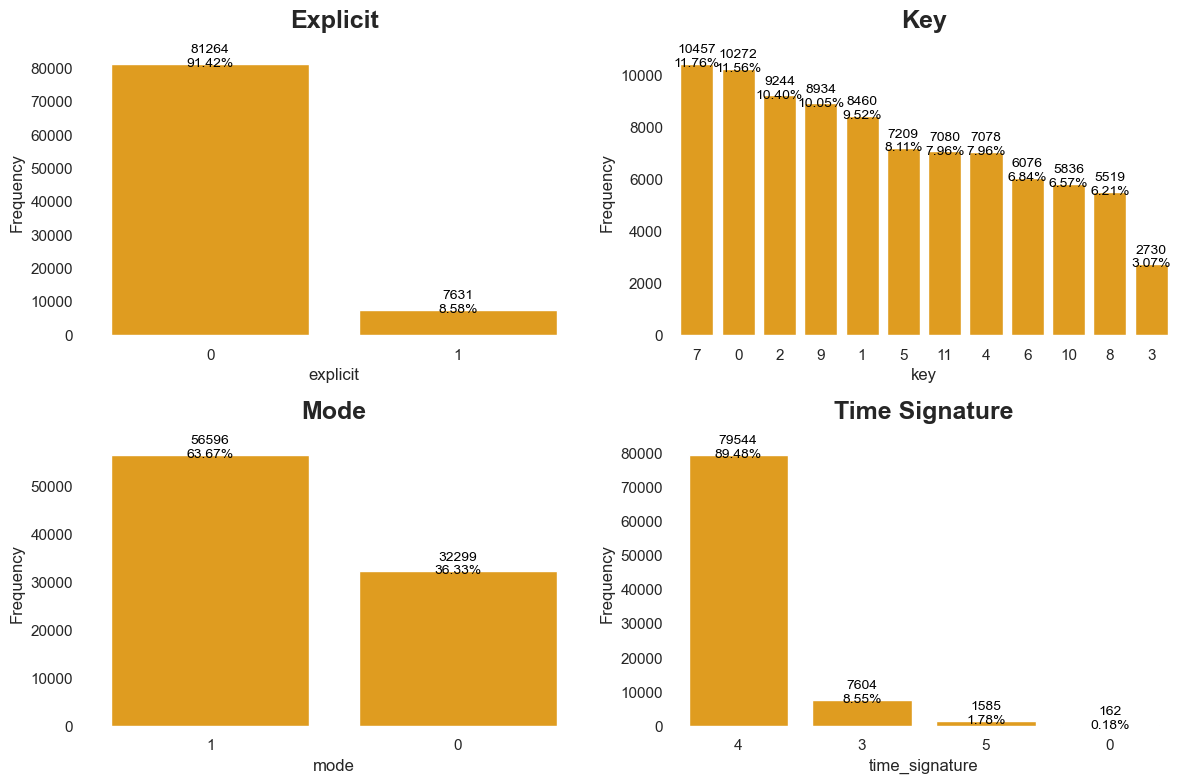

In [211]:
def create_countplot_with_values_and_percentages(data, x_col, ax, title, order=None, color=None):
    sns.countplot(data=data, x=x_col, ax=ax, order=order, color=color)
    ax.set_title(title, fontsize=18, fontweight='bold', y=1.05)

    total_height = len(data)
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}\n{height/total_height:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

        ax.set_ylabel('Frequency', fontsize=12)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        ax.grid(False)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

bar_color = 'orange'

create_countplot_with_values_and_percentages(imploded_df, 'explicit', axes[0, 0], 'Explicit', order=imploded_df['explicit'].value_counts().index, color=bar_color)
create_countplot_with_values_and_percentages(imploded_df, 'key', axes[0, 1], 'Key', order=imploded_df['key'].value_counts().index, color=bar_color)
create_countplot_with_values_and_percentages(imploded_df, 'mode', axes[1, 0], 'Mode', order=imploded_df['mode'].value_counts().index, color=bar_color)
create_countplot_with_values_and_percentages(imploded_df, 'time_signature', axes[1, 1], 'Time Signature', order=imploded_df['time_signature'].value_counts().index, color=bar_color)

plt.tight_layout()

plt.show()

### Observations:
- Explicit
    1. Approximately 8.5% of the songs feature explicit lyrics, with comedy, emo, and sad genres prominently leading this category.
    2. Explicit tracks exhibit slightly higher danceability, with a mean of 0.63 compared to the overall mean of 0.56
- Mode
    1. Genres such as honky-tonk, country, world-music, children, and bluegrass predominantly consist of songs in the 'major' mode, accounting for more than 85% of their total compositions. This suggests that within these genres, tracks are more inclined to be either major or minor, rather than being evenly distributed between the two modes.
    2. Analysis of the data reveals that there are no substantial differences in the mean and median values of danceability and energy between tracks in the major and minor modes.
- Time Signature
    1. Approximately 90% of the dataset is represented by songs with a time signature of 4.
    2. The remaining 10% of the dataset consists of songs with time signatures 3, 5, or 0. These songs exhibit lower average values for danceability (0.43) and energy (0.45) when compared to songs with a time signature of 4, which have higher mean danceability (0.58) and energy (0.66) values.

In [203]:
exploded_df[exploded_df['time_signature'] ==3].shape

(9128, 16)

In [204]:
exploded_df[exploded_df['time_signature'] ==3]['track_genre'].value_counts()

track_genre
comedy           316
opera            265
ambient          263
sleep            259
romance          252
                ... 
drum-and-bass      9
reggaeton          8
forro              6
reggae             5
pagode             3
Name: count, Length: 114, dtype: int64

In [209]:
exploded_df[exploded_df['time_signature'].isin([3,5,0])].describe()

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000,11096.000000
mean,29.810112,218.361244,0.079578,0.435465,0.454297,5.095440,-11.877504,0.672044,0.106987,0.558152,0.235275,0.218067,0.341900,119.190232,3.281273
std,21.452079,126.872290,0.270651,0.184635,0.283912,3.506666,7.104853,0.469490,0.179416,0.363280,0.372649,0.206463,0.239959,37.353865,0.838954
min,0.000000,8.586000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,158.534750,0.000000,0.297000,0.216000,2.000000,-15.117000,0.000000,0.034000,0.180500,0.000000,0.101000,0.148000,92.163750,3.000000
50%,27.000000,200.773500,0.000000,0.442000,0.430000,5.000000,-10.019000,1.000000,0.043200,0.664000,0.000197,0.127000,0.304000,117.916000,3.000000
75%,47.000000,255.798750,0.000000,0.571000,0.674000,8.000000,-6.756000,1.000000,0.075700,0.899000,0.512000,0.248000,0.498250,143.004750,3.000000
max,94.000000,4120.258000,1.000000,0.971000,1.000000,11.000000,3.156000,1.000000,0.965000,0.996000,1.000000,0.992000,0.986000,243.372000,5.000000


In [206]:
exploded_df[exploded_df['time_signature'] ==4].describe()

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.000000,101487.0
mean,33.743780,229.326943,0.086257,0.582787,0.664342,5.336319,-7.802238,0.633855,0.081834,0.284770,0.145574,0.212816,0.490020,122.635395,4.0
std,22.367781,103.528695,0.280745,0.165122,0.236946,3.566111,4.493826,0.481752,0.092168,0.315248,0.298757,0.188225,0.256778,29.013050,0.0
min,0.000000,0.000000,0.000000,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,4.0
25%,18.000000,176.051000,0.000000,0.477000,0.508000,2.000000,-9.487500,0.000000,0.036100,0.014100,0.000000,0.097300,0.280000,99.984000,4.0
50%,35.000000,214.253000,0.000000,0.594000,0.706000,5.000000,-6.761000,1.000000,0.049600,0.139000,0.000036,0.133000,0.485000,122.736000,4.0
75%,50.000000,262.200000,0.000000,0.705000,0.861000,8.000000,-4.876000,1.000000,0.085000,0.521000,0.033700,0.276000,0.697000,140.051500,4.0
max,100.000000,5237.295000,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.963000,0.996000,1.000000,1.000000,0.995000,220.525000,4.0


# Exploring Genre feature
1. Ordering Mean Danceability by Genre
2. Genre Co-occurence

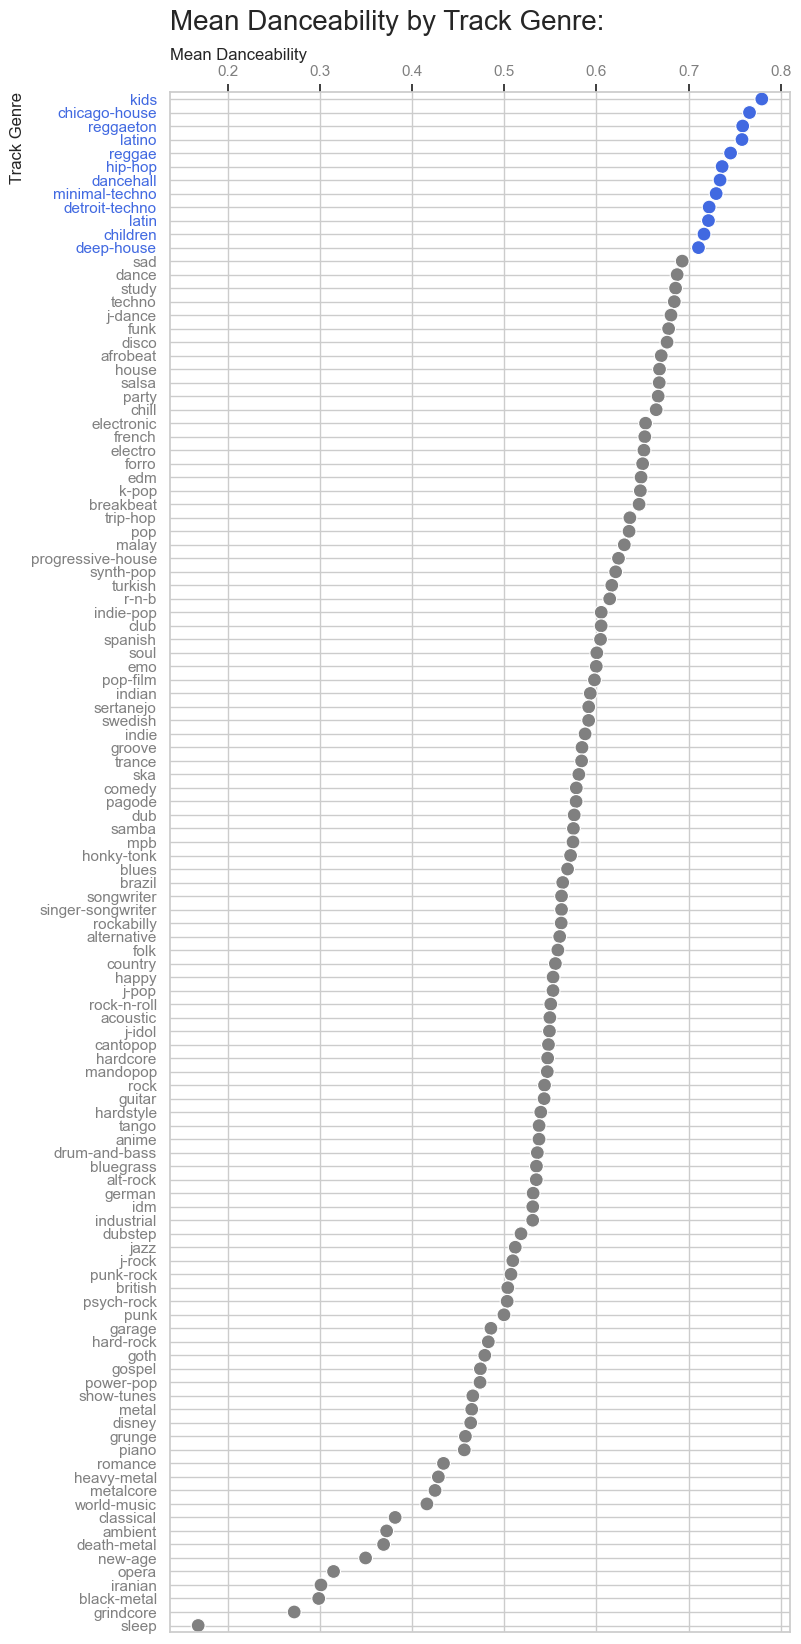

In [97]:
plt.figure(figsize=(8, 20))
sns.set(style="whitegrid")

mean_danceability = exploded_df.groupby('track_genre')['danceability'].mean().reset_index()
mean_danceability = mean_danceability.sort_values(by='danceability', ascending=False)

custom_palette = {'royalblue': 'royalblue', 'gray': 'gray'}

mean_danceability['color'] = np.where(mean_danceability['danceability'] > 0.7, 'royalblue', 'gray')

sns.scatterplot(x='danceability', y='track_genre', data=mean_danceability, s=100, hue='color', palette=custom_palette)

ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xlabel('Mean Danceability', loc='left')
plt.ylabel('Track Genre', loc='top')
plt.title('Mean Danceability by Track Genre:', fontsize=20, loc='left', y=1.035)

plt.legend().remove()

for label in ax.get_xticklabels():
    label.set_color('gray')

for label in ax.get_yticklabels():
    genre = label.get_text()
    row = mean_danceability[mean_danceability['track_genre'] == genre].iloc[0]
    label.set_color(row['color'])

ax.set_ylim(len(mean_danceability) - 0.5, -0.5)

plt.show()


### Observations:

## Genre Co-occurence

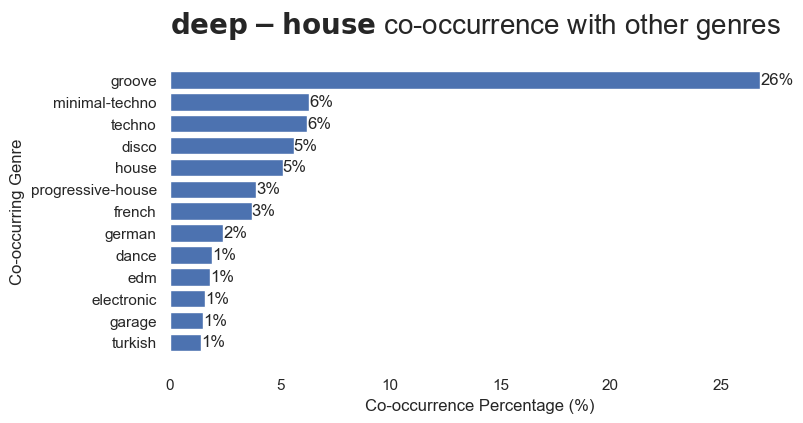

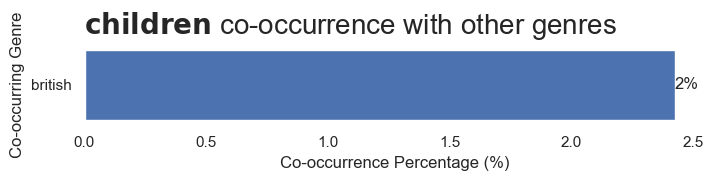

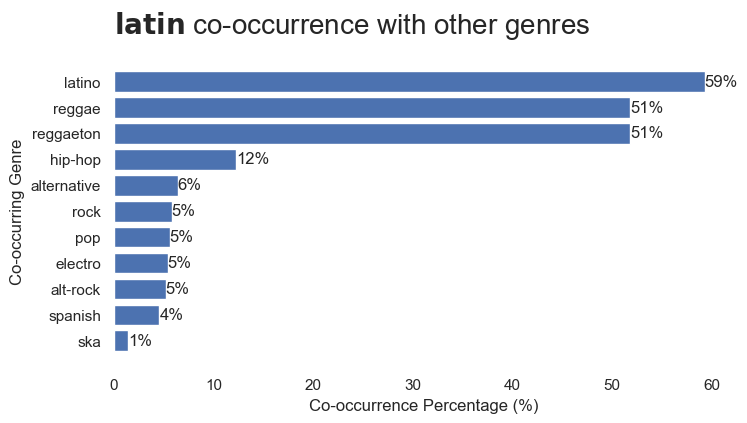

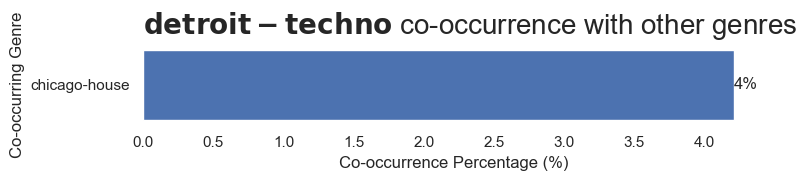

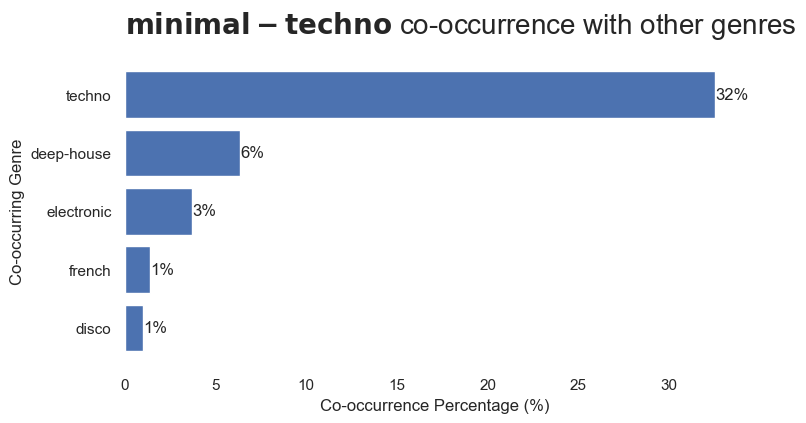

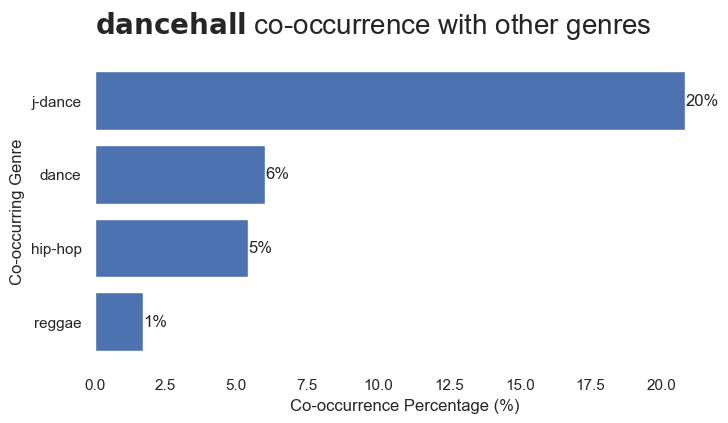

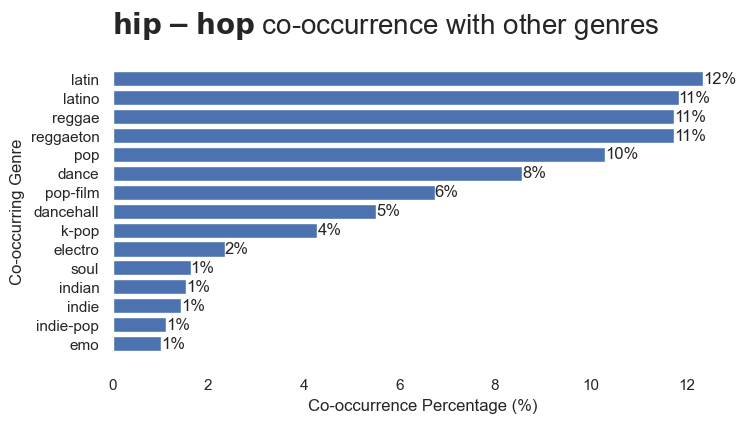

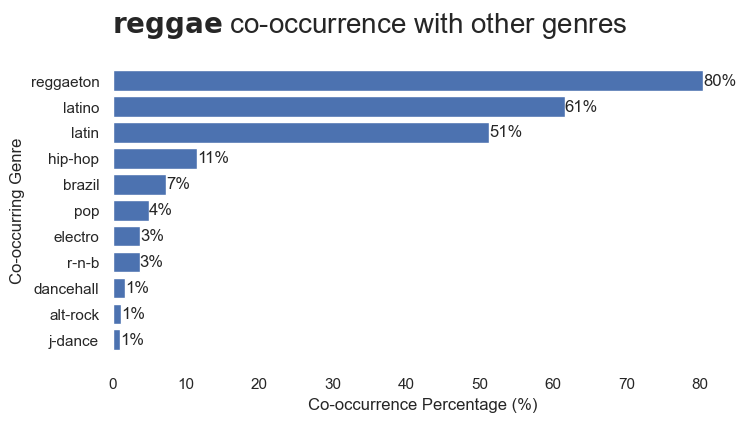

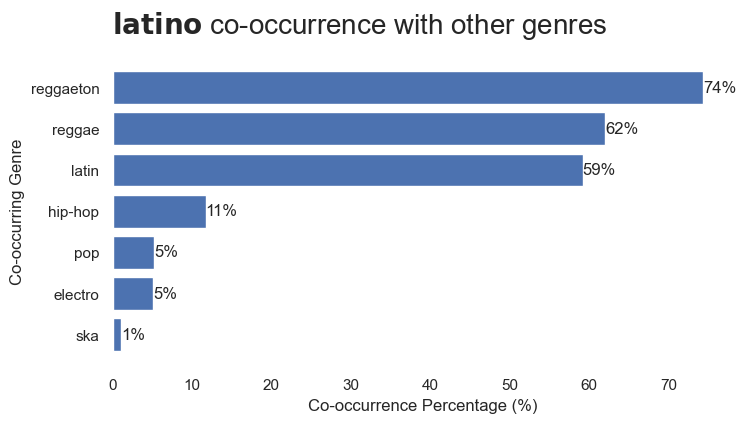

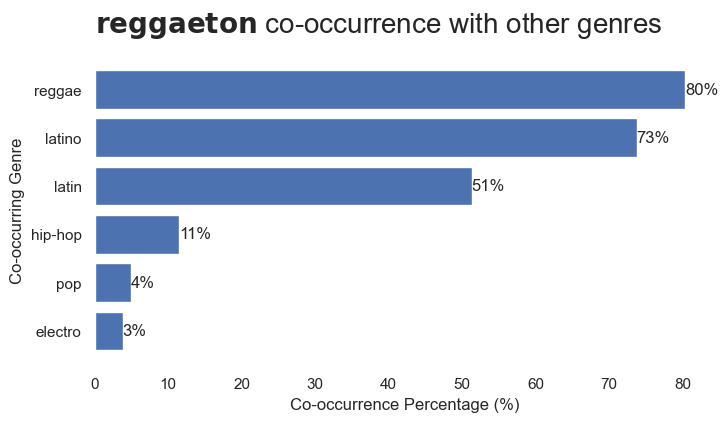

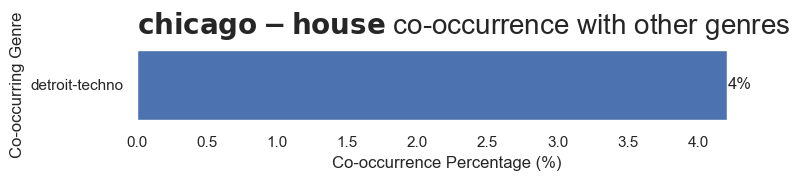

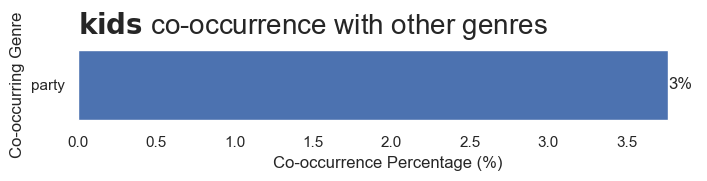

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter

def genre_cooccurrence(genres_list, genre):
    filtered_list = [sublist for sublist in genres_list if genre in sublist]
    total_tracks = len(filtered_list)
    word_list = list(chain.from_iterable(filtered_list))
    filtered_word_list = list(filter(lambda word: word != genre, word_list))
    word_counts = Counter(filtered_word_list)
    
    word_count_list = [{'Genre': word, 'Cooccurrence_Percentage': (count / total_tracks) * 100} for word, count in word_counts.items()]
    df = pd.DataFrame(word_count_list)
    df = df[df['Cooccurrence_Percentage'] >= 1]

    if df.empty:
        print("No data points with cooccurrence percentage greater than or equal to 1% found.")
        return

    sorted_df = df.sort_values('Cooccurrence_Percentage', ascending=False)

    if len(sorted_df) == 1:
        fig, ax = plt.subplots(figsize=(8, 1))
    else:
        fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(sorted_df['Genre'], sorted_df['Cooccurrence_Percentage'], color='C0')
    ax.set_xlabel('Co-occurrence Percentage (%)')
    ax.set_ylabel('Co-occurring Genre')
    ax.set_title('{} co-occurrence with other genres'.format(r'$\mathbf{' + genre + '}$'), loc='left', fontsize=20, y=1.05)

    ax.invert_yaxis()

    for spine in ax.spines.values():
        spine.set_visible(False)

    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}%', ha='left', va='center')

    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)

    plt.show()

fig_list = []

genres_list = imploded_df['track_genre'].str.split(',')
mean_danceability = exploded_df.groupby('track_genre')['danceability'].mean().reset_index().sort_values('danceability')
top_list = list(mean_danceability[mean_danceability['danceability']>0.7]['track_genre'])

for i in top_list:
    genre_cooccurrence(genres_list, i)





### Observations: